In [0]:
!unzip /content/11-T1post-80644.zip


Archive:  /content/11-T1post-80644.zip
  inflating: 11-T1post-80644/000000.dcm  
  inflating: 11-T1post-80644/000001.dcm  
  inflating: 11-T1post-80644/000002.dcm  
  inflating: 11-T1post-80644/000003.dcm  
  inflating: 11-T1post-80644/000004.dcm  
  inflating: 11-T1post-80644/000005.dcm  
  inflating: 11-T1post-80644/000006.dcm  
  inflating: 11-T1post-80644/000007.dcm  
  inflating: 11-T1post-80644/000008.dcm  
  inflating: 11-T1post-80644/000009.dcm  
  inflating: 11-T1post-80644/000010.dcm  
  inflating: 11-T1post-80644/000011.dcm  
  inflating: 11-T1post-80644/000012.dcm  
  inflating: 11-T1post-80644/000013.dcm  
  inflating: 11-T1post-80644/000014.dcm  
  inflating: 11-T1post-80644/000015.dcm  
  inflating: 11-T1post-80644/000016.dcm  
  inflating: 11-T1post-80644/000017.dcm  
  inflating: 11-T1post-80644/000018.dcm  
  inflating: 11-T1post-80644/000019.dcm  
  inflating: 11-T1post-80644/000020.dcm  
  inflating: 11-T1post-80644/000021.dcm  
  inflating: 11-T1post-80644/000022.d

In [0]:
!pip install pydicom
!pip install dicom

     |████████████████████████████████| 7.1MB 2.7MB/s 
     |████████████████████████████████| 768kB 2.9MB/s 


In [0]:
import os
#Dicom
PathDicom = "/content/11-T1post-80644/"
lstFilesDCM = []  
for dirName, subdirList, fileList in os.walk(PathDicom):
  for filename in fileList:
    if ".dcm" in filename.lower():
      lstFilesDCM.append(os.path.join(dirName,filename))

In [0]:
import dicom
import os
import numpy
from matplotlib import pyplot, cm
RefDs = dicom.read_file(lstFilesDCM[0])
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFilesDCM))
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))

/usr/local/lib/python3.6/dist-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [0]:
x = numpy.arange(0.0, (ConstPixelDims[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])
y = numpy.arange(0.0, (ConstPixelDims[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1])
z = numpy.arange(0.0, (ConstPixelDims[2]+1)*ConstPixelSpacing[2], ConstPixelSpacing[2])

In [0]:
ArrayDicom = numpy.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)

# loop through all the DICOM files
for filenameDCM in lstFilesDCM:
    # read the file
    ds = dicom.read_file(filenameDCM)
    # store the raw image data
    ArrayDicom[:, :, lstFilesDCM.index(filenameDCM)] = ds.pixel_array

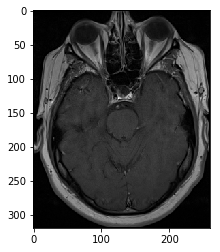

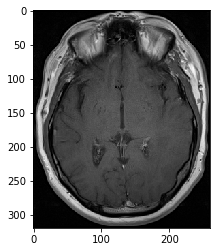

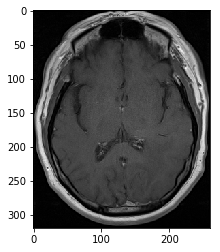

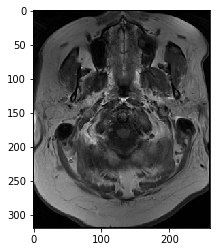

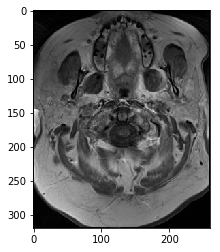

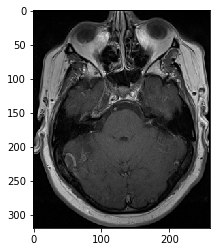

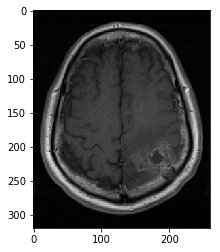

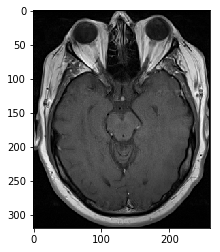

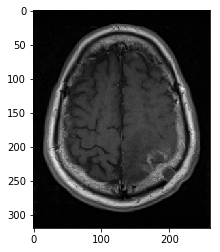

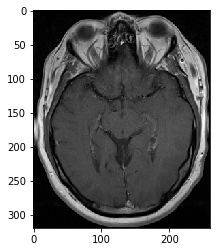

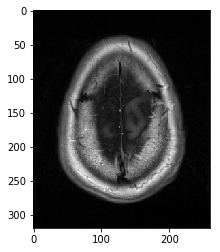

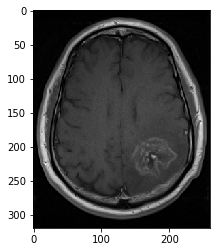

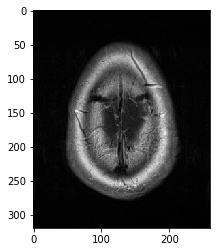

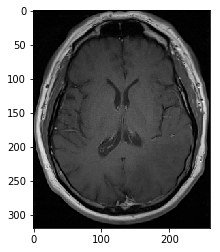

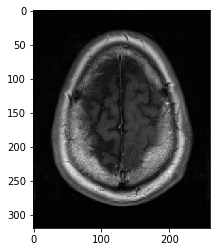

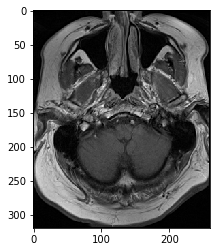

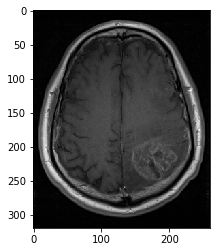

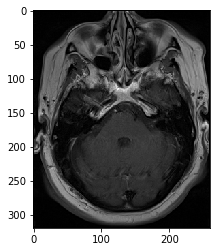

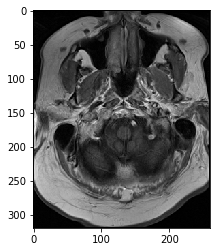

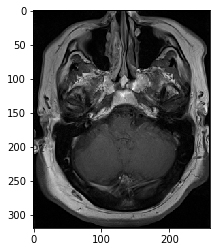

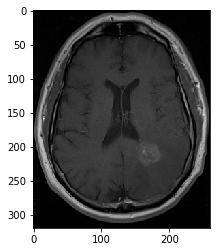

In [0]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
for i in range(0,21):
  plt.imshow(ArrayDicom[:, :, i],cmap='gray')
  plt.show()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp '/content/drive/My Drive/Fusion (1).h5' '/content/'

In [3]:
from keras.layers import Input, Conv2D,Concatenate
from keras.models import Model

#ENCODER
#creating the First Layer
inimg = Input(shape=(224,224,1))
conv1 = Conv2D(16, kernel_size=3, strides=1, activation='relu',padding='SAME')(inimg)

#creating the Dense Block
DC1 = Conv2D(16, kernel_size=3, strides=1, activation='relu',padding='SAME')(conv1)

DC2_input = Concatenate(axis=3)([conv1,DC1])
DC2 = Conv2D(16, kernel_size=3, strides=1, activation='relu',padding='SAME')(DC2_input)

DC3_input = Concatenate(axis=3)([conv1,DC1,DC2])
DC3 = Conv2D(16, kernel_size=3, strides=1, activation='relu',padding='SAME')(DC3_input)
DC4_input = Concatenate(axis=3)([conv1,DC1,DC2,DC3])
#Decoder

Conv2 = Conv2D(64, kernel_size=3, strides=1, activation='relu',padding='SAME')(DC4_input)
Conv3 = Conv2D(32, kernel_size=3, strides=1, activation='relu',padding='SAME')(Conv2)
Conv4 = Conv2D(16, kernel_size=3, strides=1, activation='relu',padding='SAME')(Conv3)
Conv5 = Conv2D(1, kernel_size=3, strides=1, activation='relu',padding='SAME')(Conv4)

Using TensorFlow backend.


In [4]:
 Autoencoder = Model(inputs=inimg,output=Conv5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  """Entry point for launching an IPython kernel.


In [0]:
import tensorflow as tf
import numpy as np
def ssim_loss(img1, img2):
    size=11 
    sigma=1.5
    #SSIM
    #ssim_loss_value=tf.image.ssim(img1,img2,max_val=1,filter_size=11,filter_sigma=1.5,k1=0.01,k2=0.03)
    ssim_loss_value = tf.image.ssim(tf.convert_to_tensor(img1), tf.convert_to_tensor(img2), max_val=255, filter_size=11,filter_sigma=1.5, k1=0.01, k2=0.03)
    #Lp
    
    pixel_loss = tf.sqrt(tf.reduce_sum(tf.square(img1 - img2)))
    ssim_loss = 1 - ssim_loss_value
    loss = 10*ssim_loss + pixel_loss
    return loss

In [6]:
Autoencoder.compile(optimizer='adam',loss=ssim_loss,metrics=['accuracy'])

In [7]:
from keras.models import load_model
Autoencoder = load_model('/content/Fusion (1).h5', custom_objects={'ssim_loss':ssim_loss})

In [11]:
print(Autoencoder.keys())

AttributeError: ignored

In [0]:
encoder = Model(inputs=Autoencoder.layers[0].input,outputs=Autoencoder.layers[7].output)

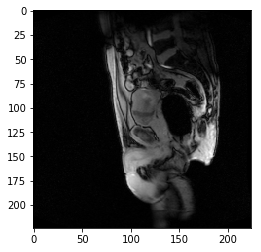

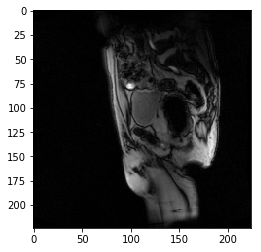

In [29]:
import tqdm
X=cv2.resize(ArrayDicom[:, :,0],(224,224))
p=X.reshape(-1,224,224,1)
total = np.zeros_like(p)
for i in range(0,2):
  X=cv2.resize(ArrayDicom[:, :,i],(224,224))
  p=X.reshape(-1,224,224,1)
  pyplot.imshow(p[0,:,:,0],cmap='gray')
  name =str(i)+'.jpg'
  plt.savefig(name)
  plt.show()
  pe=encoder.predict(p)
  total=pe+total

In [0]:
total=total/2

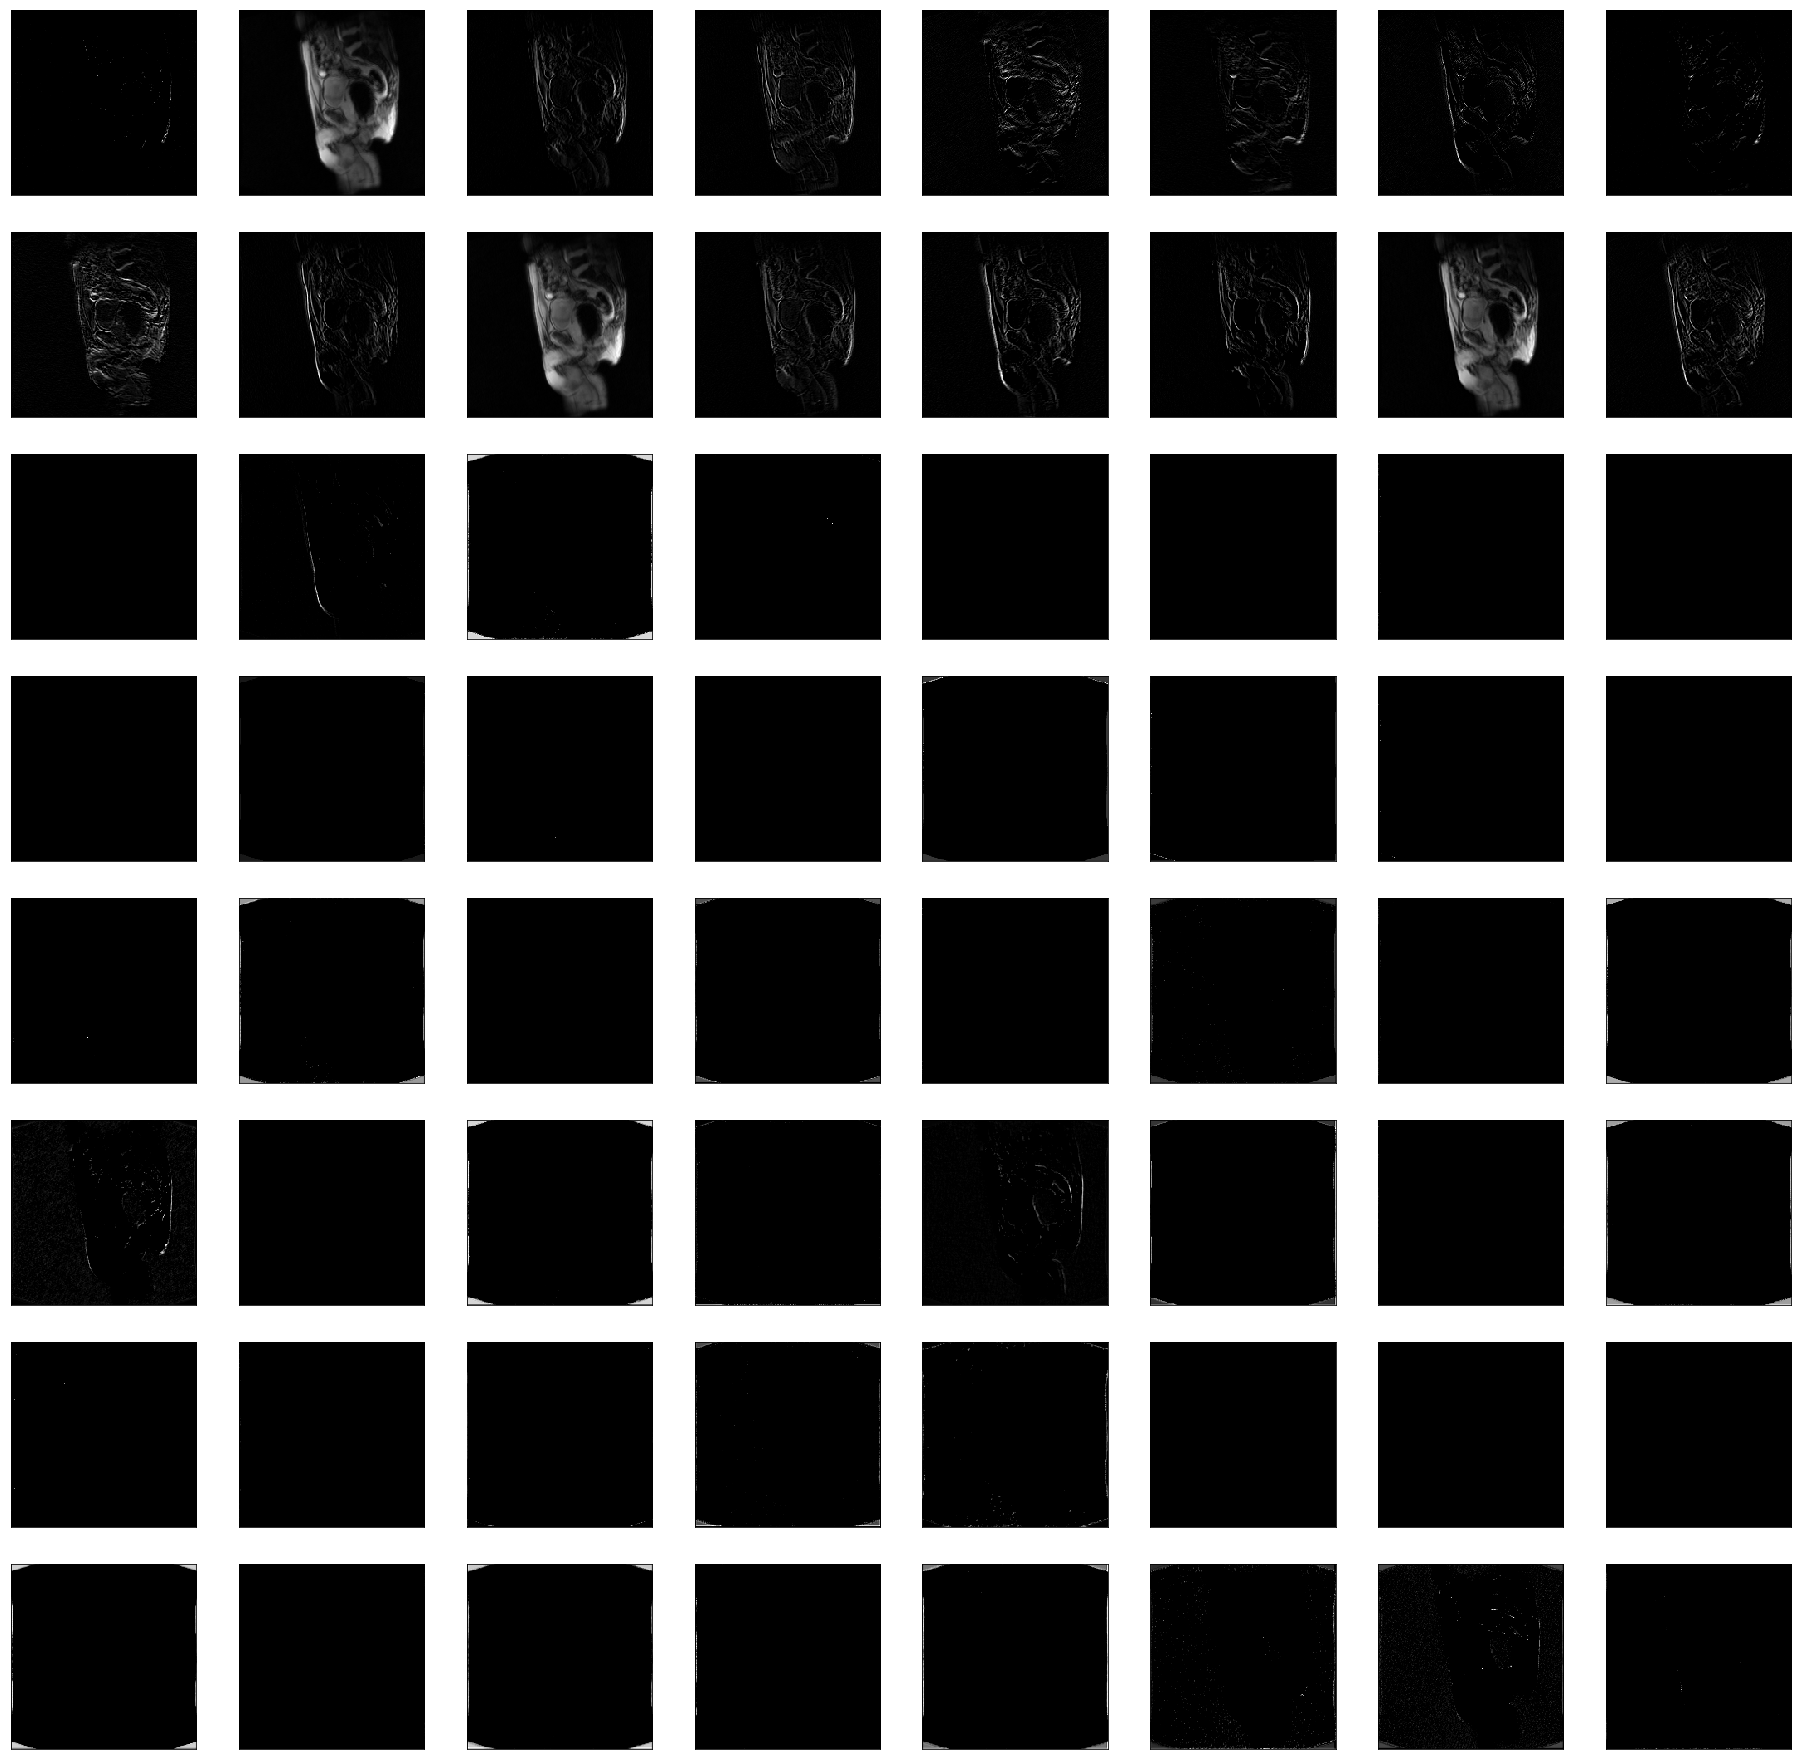

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize = (32, 32))
square = 8
ix =1
for _ in range(square):
  for _ in range(square):
    ax =pyplot.subplot(square,square,ix)
    ax.set_xticks([])
    ax.set_yticks([])
    pyplot.imshow(total[0,:,:,ix-1],cmap='gray')
    ix+=1
pyplot.show()    

In [0]:
from keras.models import Sequential
m = Sequential()
for layer in Autoencoder.layers[8:]:
  m.add(layer)

In [0]:
fuse_brain=m.predict(total)

In [34]:
fuse_brain.shape

(1, 224, 224, 1)

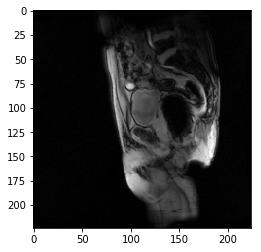

In [35]:
from google.colab.patches import cv2_imshow
plt.imshow(fuse_brain[0,:,:,0],cmap='gray')
plt.savefig('fuse.jpg')

In [0]:
from tqdm import tqdm
X=cv2.resize(ArrayDicom[:, :,0],(224,224))
T=[]
TE=[]
for i in tqdm(range(0,2)):
  X=cv2.resize(ArrayDicom[:, :,i],(224,224))
  p=X.reshape(-1,224,224,1)
  pe=encoder.predict(p)
  pet=pe.copy()
  TE.append(pe)
  for i in tqdm(range(0,64)):
    pet[0,:,:,i]=FusioFunction_lbp(pe[0,:,:,i])
  T.append(pet)
  

In [0]:
#fuse_lbp =TE[0]*(T[0]+T[1]+T[2]+T[3])+TE[1]*(T[0]+T[1]+T[2]+T[3])+TE[2]*(T[0]+T[1]+T[2]+T[3])+TE[3]*(T[0]+T[1]+T[2]+T[3])
fuse_lbp =TE[0]*(T[0]/(T[0]+T[1]))+TE[1]*(T[1]/(T[0]+T[1]))

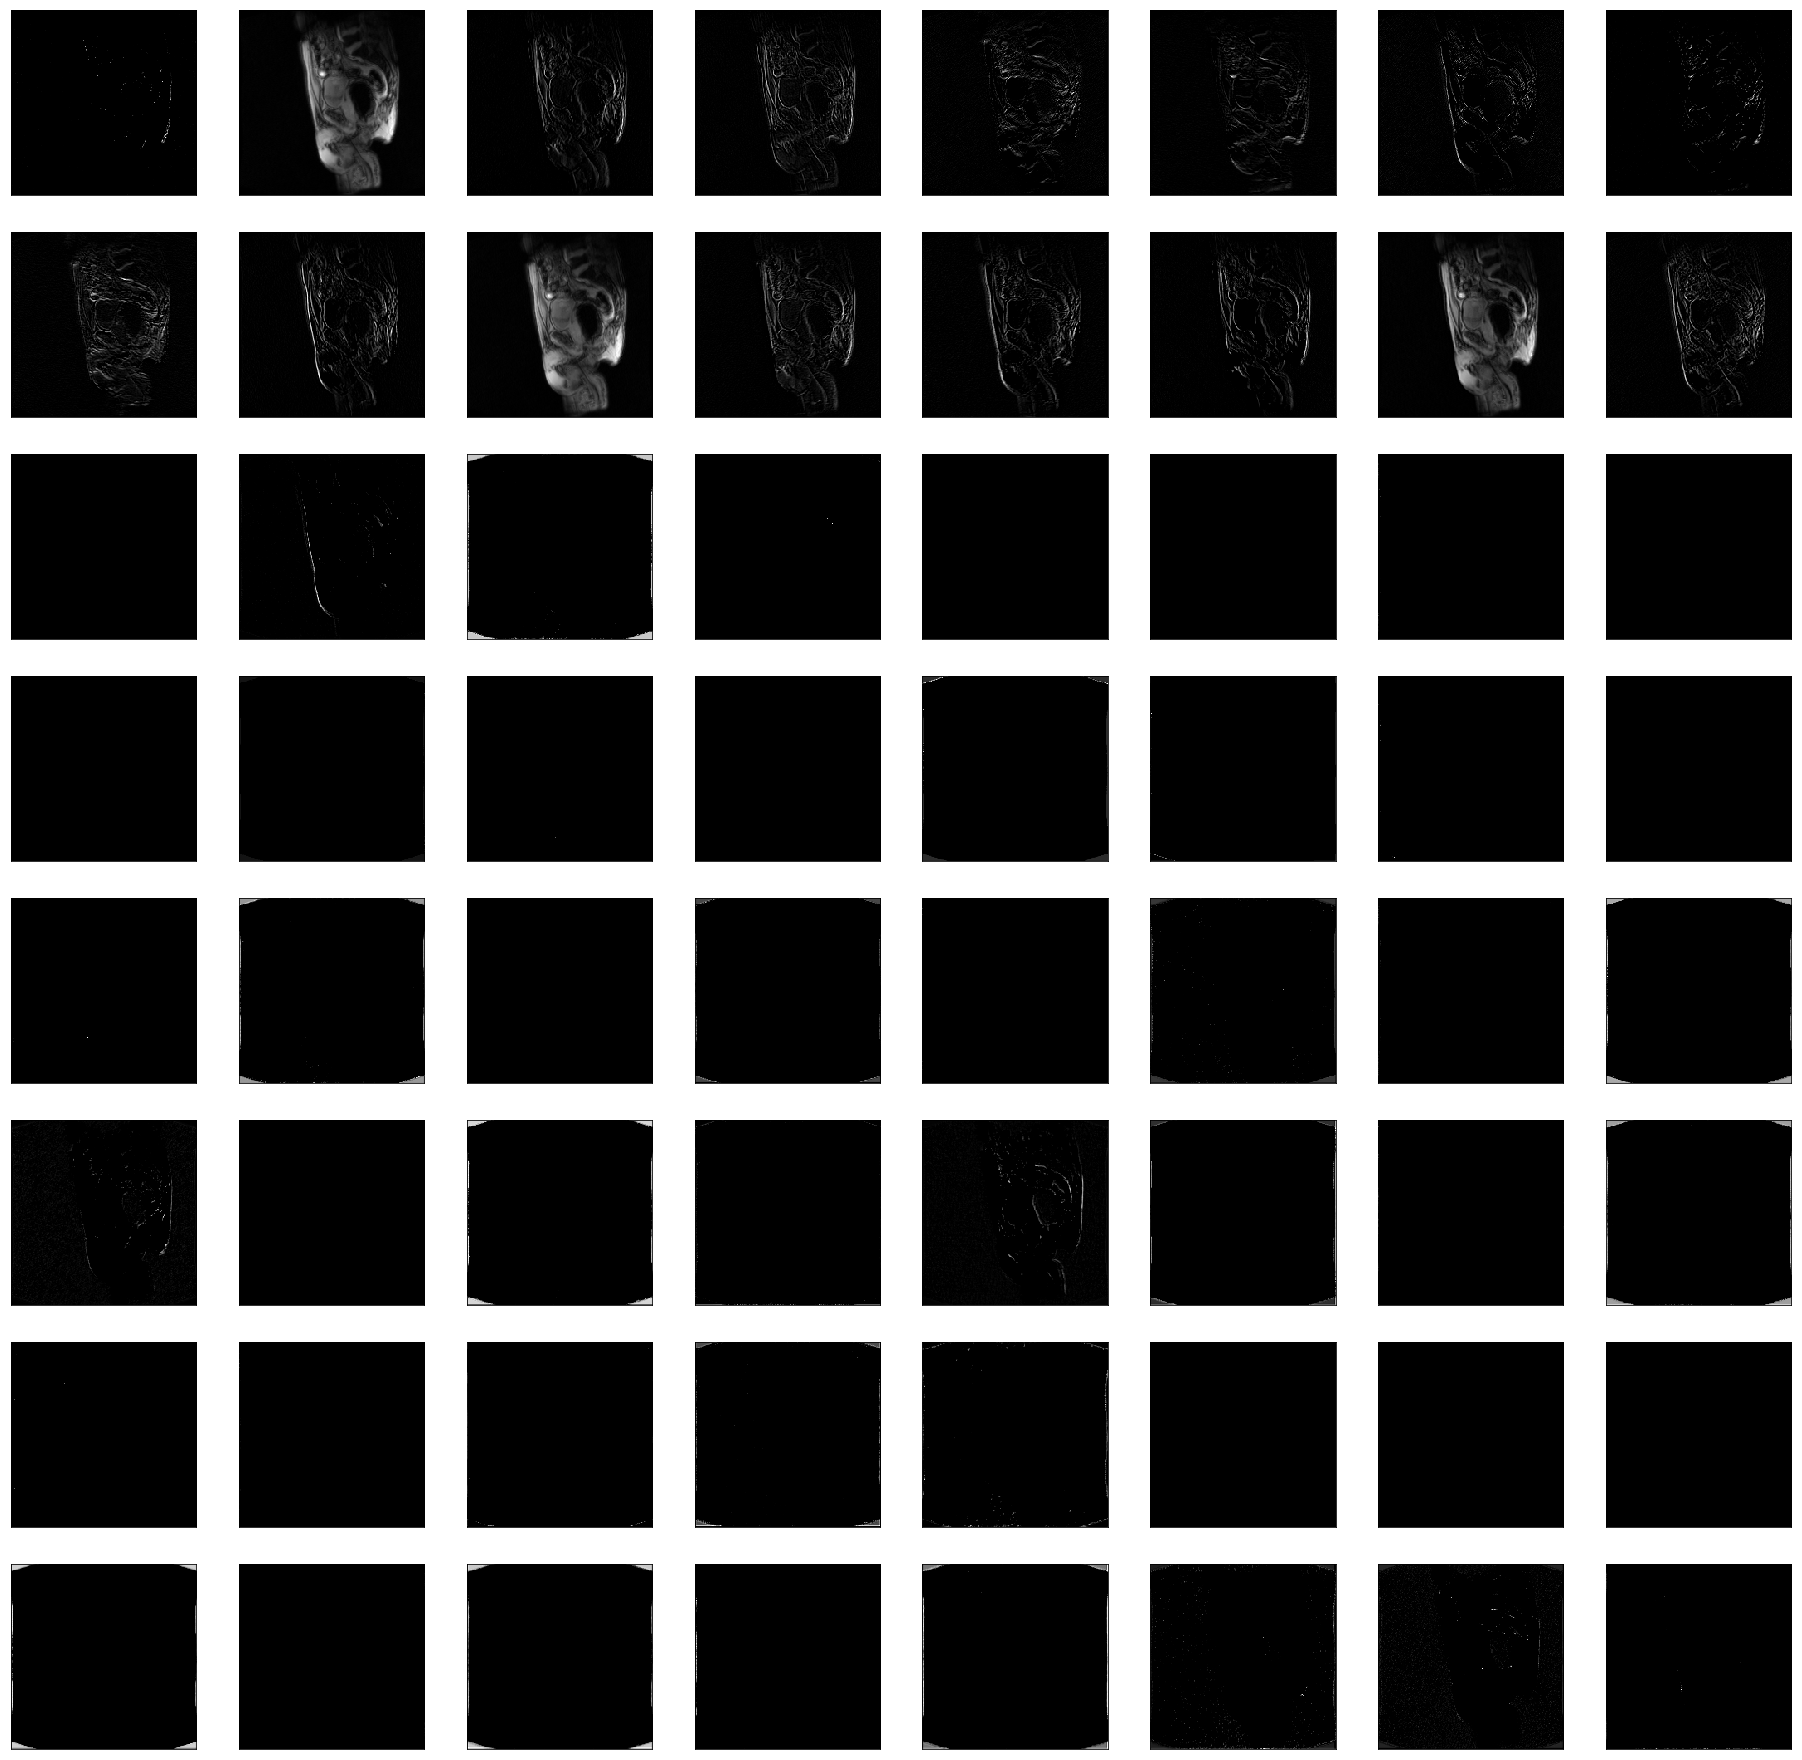

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize = (32, 32))
square = 8
ix =1
for _ in range(square):
  for _ in range(square):
    ax =pyplot.subplot(square,square,ix)
    ax.set_xticks([])
    ax.set_yticks([])
    pyplot.imshow(fuse_lbp[0,:,:,ix-1],cmap='gray')
    ix+=1
pyplot.show()    

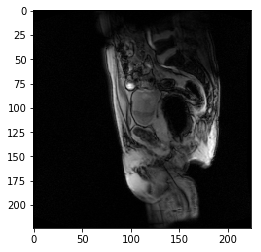

In [42]:
fuse_P_medical=m.predict(fuse_lbp)
plt.imshow(fuse_P_medical[0,:,:,0],cmap='gray')
plt.savefig('fuse.jpg')

In [133]:
##### Brest
!unzip /content/us104.zip

Archive:  /content/us104.zip
  inflating: us101.bmp               
  inflating: us102.bmp               
  inflating: us103.bmp               
  inflating: us104.bmp               
  inflating: us105.bmp               


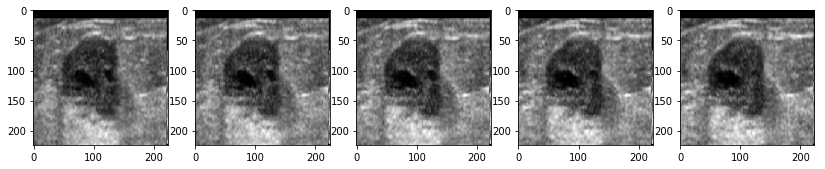

In [135]:
#medical image
us1 = cv2.imread('/content/us101.bmp',0)
us1=cv2.resize(us1,(224,224))
us1=np.array(us1).reshape(-1,224,224,1)
us2 = cv2.imread('/content/us102.bmp',0)
us2=cv2.resize(us2,(224,224))
us2=np.array(us2).reshape(-1,224,224,1)
us3 = cv2.imread('/content/us103.bmp',0)
us3=cv2.resize(us3,(224,224))
us3=np.array(us3).reshape(-1,224,224,1)
us4 = cv2.imread('/content/us104.bmp',0)
us4=cv2.resize(us4,(224,224))
us4=np.array(us4).reshape(-1,224,224,1)
us5 = cv2.imread('/content/us105.bmp',0)
us5=cv2.resize(us5,(224,224))
us5=np.array(us5).reshape(-1,224,224,1)


fig=plt.figure(figsize=(14, 14))

fig.add_subplot(1, 5, 1)
fig.title='Fused Image'
plt.imshow(us1[0,:,:,0],cmap='gray')

fig.add_subplot(1, 5, 2)
plt.imshow(us2[0,:,:,0],cmap='gray')

fig.add_subplot(1, 5, 3)
plt.imshow(us3[0,:,:,0],cmap='gray')

fig.add_subplot(1, 5, 4)
plt.imshow(us4[0,:,:,0],cmap='gray')

fig.add_subplot(1, 5, 5)
plt.imshow(us5[0,:,:,0],cmap='gray')

plt.show()

In [0]:
us1E = encoder.predict(us1)
us2E = encoder.predict(us2)
us3E = encoder.predict(us3)
us4E = encoder.predict(us4)
us5E = encoder.predict(us5)

In [0]:
fuse_medical = (us1E+us2E+us3E+us4E+us5E)/5
fuse_P_medical=m.predict(fuse_medical)

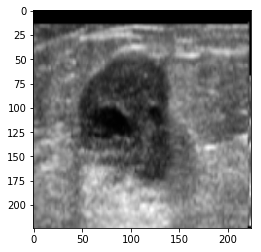

In [138]:
plt.imshow(fuse_P_medical[0,:,:,0],cmap='gray')
plt.savefig('fuse.jpg')


In [0]:
import numpy as np
#Fusion Functions
def FusioFunction_lbp(img):
  
  imgPADLBP=np.pad(img,pad_width=1,mode='constant', constant_values=0)
  imgLBP = np.zeros_like(img)
  window=3
  for ih in range(0,imgPADLBP.shape[0]-window+1):
    for iw in range(0,imgPADLBP.shape[1]-window+1):
      image = imgPADLBP[ih:ih+window,iw:iw+window]
      center = image[1,1]
      
      '''img01=(image>=center)*1
      img01_vector = img01.T.flatten()'''
      sum1=0
      for i in range(0,3):
        for j in range(0,3):
          sum1= sum1 + abs(center-image[i][j])
      
      
      '''img01_vector= np.delete(img01_vector,4)
      where_img01_vector = np.where(img01_vector)[0]
      if len(where_img01_vector) >= 1:
        num = np.sum(2**where_img01_vector)
      else:
        num = 0'''
      if sum1==0:
        sum1=1
      imgLBP[ih,iw]=sum1/8
  return imgLBP

In [0]:
import tqdm
us1ET=us1E.copy()
us2ET=us2E.copy()
us3ET=us3E.copy()
us4ET=us4E.copy()
us5ET=us5E.copy()
fuse_map=us1E.copy()
Fuse_LBP =np.zeros_like(us1ET)
for i in range(0,64):
  us1ET[0,:,:,i]=FusioFunction_lbp(us1E[0,:,:,i])
  us2ET[0,:,:,i]=FusioFunction_lbp(us2E[0,:,:,i])
  us3ET[0,:,:,i]=FusioFunction_lbp(us3E[0,:,:,i])
  us4ET[0,:,:,i]=FusioFunction_lbp(us4E[0,:,:,i])
  us5ET[0,:,:,i]=FusioFunction_lbp(us5E[0,:,:,i])
fuse_map=(us1ET/(us1ET+us2ET+us3ET+us4ET+us5ET))*us1E+(us2ET/(us1ET+us2ET+us3ET+us4ET+us5ET))*us2E+(us3ET/(us1ET+us2ET+us3ET+us4ET+us5ET))*us3E+(us4ET/(us1ET+us2ET+us3ET+us4ET+us5ET))*us4E+(us5ET/(us1ET+us2ET+us3ET+us4ET+us5ET))*us5E

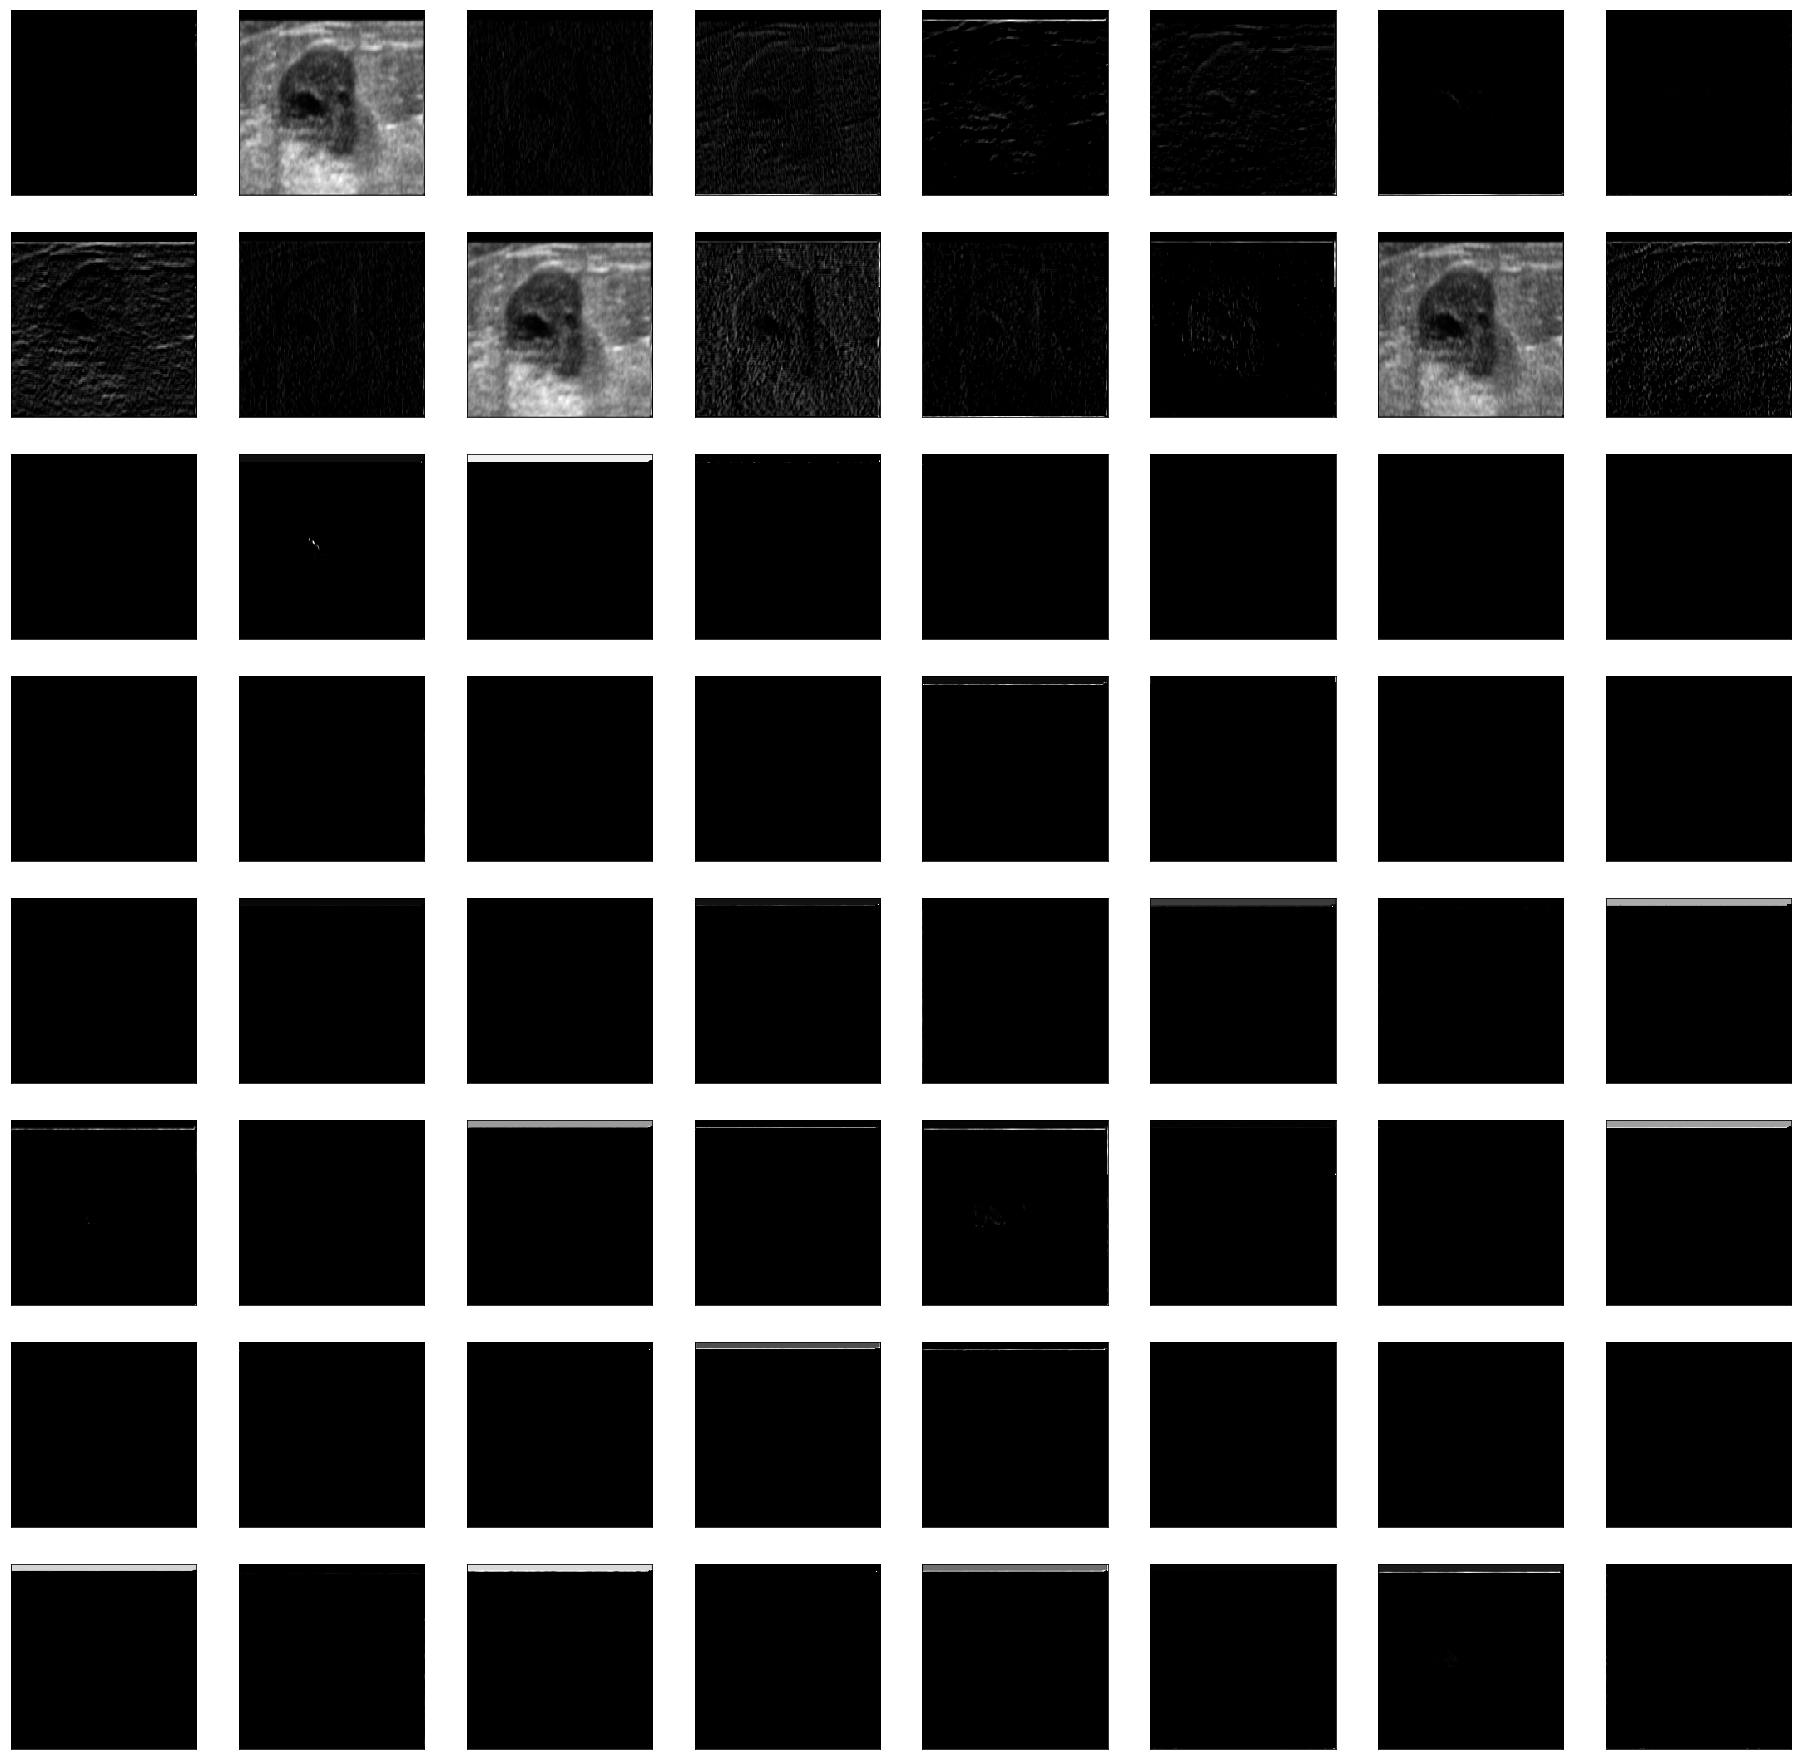

In [150]:
import matplotlib.pyplot as plt
plt.figure(figsize = (32, 32))
square = 8
ix =1
for _ in range(square):
  for _ in range(square):
    ax =pyplot.subplot(square,square,ix)
    ax.set_xticks([])
    ax.set_yticks([])
    pyplot.imshow(fuse_map[0,:,:,ix-1],cmap='gray')
    ix+=1
pyplot.show()

In [0]:
fuse_final_LBP=m.predict(fuse_map)

In [0]:
g=fuse_final_LBP.astype(np.uint8)

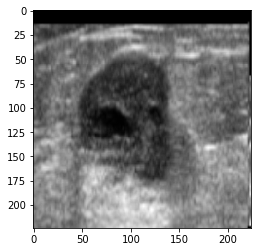

In [157]:
plt.imshow(fuse_final_LBP[0,:,:,0],cmap='gray')
plt.savefig('fuse.jpg')

In [0]:
#PRostet
import os
PathDicom = "/content/"
lstFilesDCM = []  
for dirName, subdirList, fileList in os.walk(PathDicom):
  for filename in fileList:
    if ".dcm" in filename.lower():
      lstFilesDCM.append(os.path.join(dirName,filename))

In [6]:
!pip install dicom
import dicom
import os
import numpy
from matplotlib import pyplot, cm
RefDs = dicom.read_file(lstFilesDCM[0])
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFilesDCM))
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))

     |████████████████████████████████| 768kB 6.0MB/s 


/usr/local/lib/python3.6/dist-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [0]:
x = numpy.arange(0.0, (ConstPixelDims[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])
y = numpy.arange(0.0, (ConstPixelDims[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1])
z = numpy.arange(0.0, (ConstPixelDims[2]+1)*ConstPixelSpacing[2], ConstPixelSpacing[2])

In [0]:
ArrayDicom = numpy.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)

# loop through all the DICOM files
for filenameDCM in lstFilesDCM:
    # read the file
    ds = dicom.read_file(filenameDCM)
    # store the raw image data
    ArrayDicom[:, :, lstFilesDCM.index(filenameDCM)] = ds.pixel_array

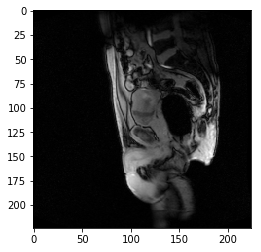

NameError: ignored

In [15]:
from tqdm import tqdm
import cv2
import numpy as np
import matplotlib.pyplot as plt
X=cv2.resize(ArrayDicom[:, :,0],(224,224))
p=X.reshape(-1,224,224,1)
total = np.zeros_like(p)
for i in range(0,4):
  X=cv2.resize(ArrayDicom[:, :,i],(224,224))
  p=X.reshape(-1,224,224,1)
  pyplot.imshow(p[0,:,:,0],cmap='gray')
  name =str(i)+'.jpg'
  plt.savefig(name)
  plt.show()
  pe=encoder.predict(p)
  total=pe+total

In [0]:
import cv2
from skimage.filters.rank import entropy
from skimage.morphology import disk
img = cv2.imread('/content/fuse.jpg',0)
imgE=entropy(img, disk(10))

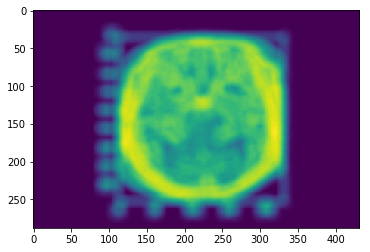

In [6]:
import matplotlib.pyplot as plt
plt.imshow(imgE)